# Import af biblioteker  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Indlæsning af data

In [4]:
df = pd.read_csv('../data/Data_Train.csv')
df.sample(5)

,Airline,Date_of_Journey,Source,Dep_Time,Destination,Class,Price
1421,Air India,24/06/2019,Banglore,10:00,Delhi,0,6961
6837,IndiGo,1/06/2019,Mumbai,21:20,Hyderabad,0,2227
7463,GoAir,6/03/2019,Delhi,06:00,Cochin,0,6393
946,Jet Airways,01/03/2019,Banglore,05:45,New Delhi,0,27992
7959,Jet Airways,1/06/2019,Delhi,22:50,Cochin,0,10262


Vi har importeret dataene og lavet en hurtig gennemgang for at få et overblik over datasættet. Nu går vi videre med at forberede og rense dataene, så de er klar til analyse.

# 2. Rensning af data

In [7]:
# Tjekker for manglende værdier
print("Tjekker for manglende værdier:")
print(df.isnull().sum())

# Tjekker for NaN-værdier
print("Tjekker for NaN-værdier:")
print(df.isna().sum())

# Tjekker for datatyper
print("Tjekker for datatyper:")
print(df.info())

# Tjekker for duplikater
print("Tjekker for duplikater:")
print(df.duplicated().sum()) 

Tjekker for manglende værdier:
Airline            0
Date_of_Journey    0
Source             0
Dep_Time           0
Destination        0
Class              0
Price              0
dtype: int64
Tjekker for NaN-værdier:
Airline            0
Date_of_Journey    0
Source             0
Dep_Time           0
Destination        0
Class              0
Price              0
dtype: int64
Tjekker for datatyper:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Dep_Time         10683 non-null  object
 4   Destination      10683 non-null  object
 5   Class            10683 non-null  int64 
 6   Price            10683 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 584.4+ KB
None
Tjekker for duplikater:
2001


In [8]:
# Finder alle rækker der er identiske med mindst én anden (keep=False viser ALLE forekomster)
fulde_duplikater = df[df.duplicated(keep=False)]

# Udskriver samlet antal duplikerede rækker
print("Antal fuldstændige duplikatrækker (inkl. kopier):", fulde_duplikater.shape[0])

# Viser et par eksempler på de duplikerede rækker
print("\nEksempler på duplikerede rækker:")
print(fulde_duplikater.head())

# Tæller hvor mange af disse er faktiske kopier (ikke første forekomst)
antal_egentlige_duplikater = df[df.duplicated(keep=False)].duplicated().sum()
print("\nAntal gentagelser (egentlige duplikater):", antal_egentlige_duplikater)

# Tjekker hvor mange unikke rækker er det der gentages?
unikke_rækker = fulde_duplikater.drop_duplicates()
print("Antal unikke rækker blandt de duplikerede:", unikke_rækker.shape[0])

# Eksempel 1: Række 2
print("\nForekomster af række 2:")
print(df[df.eq(df.loc[2]).all(axis=1)])

# Eksempel 2: Række 6
print("\nForekomster af række 6:")
print(df[df.eq(df.loc[6]).all(axis=1)])

Antal fuldstændige duplikatrækker (inkl. kopier): 3192

Eksempler på duplikerede rækker:
        Airline Date_of_Journey    Source Dep_Time Destination  Class  Price
2   Jet Airways       9/06/2019     Delhi    09:25      Cochin      0  13882
6   Jet Airways      12/03/2019  Banglore    18:55   New Delhi      0  11087
7   Jet Airways      01/03/2019  Banglore    08:00   New Delhi      0  22270
13  Jet Airways       9/05/2019   Kolkata    21:10    Banglore      0   9663
17  Jet Airways      12/06/2019     Delhi    14:00      Cochin      0  10262

Antal gentagelser (egentlige duplikater): 2001
Antal unikke rækker blandt de duplikerede: 1191

Forekomster af række 2:
          Airline Date_of_Journey Source Dep_Time Destination  Class  Price
2     Jet Airways       9/06/2019  Delhi    09:25      Cochin      0  13882
5375  Jet Airways       9/06/2019  Delhi    09:25      Cochin      0  13882

Forekomster af række 6:
          Airline Date_of_Journey    Source Dep_Time Destination  Class  Pr

In [9]:
# Fjerner duplikaterne fra datasættet for at sikre, at kun unikke observationer er tilbage
df = df.drop_duplicates()
print("Datasættets nye størrelse efter sletning af duplikater:", df.shape)

Datasættets nye størrelse efter sletning af duplikater: (8682, 7)


Datasættet indeholder ikke nogen manglende værdier, hverken som NaN eller null. Datatyperne består hovedsageligt af tekst (object), som vi vil konvertere til string, samt nogle numeriske kolonner, der er defineret som heltal (int64) og decimaltal (float64).

Datasættet indeholder en del duplikater, hvor nogle rækker er præcist ens. Selvom duplikater kan være nyttige i nogle analyser, har vi valgt at fjerne dem her. Det gør vi for at sikre, at hver række i datasættet bidrager unikt til vores analyser og modeller. Ved at fjerne duplikaterne undgår vi, at nogle observationer får for stor vægt i analysen, hvilket kan påvirke resultaterne. Dette er vigtigt, både for lineær regression og andre statistiske analyser og maskinlæringsmodeller.

Nu opdeles datasættet i to separate dataframes: en med numeriske værdier og en med nominelle (kategoriske) data, da det bliver lettere at arbejde med disse typer.

In [11]:
# Fjerner 'Dep_Time' kolonnen, da den ikke er relevant for analysen
df.drop(['Dep_Time'], axis=1, inplace=True) 

In [12]:
# Konverterer kolonnen 'Date_of_Journey' fra tekstformat til datetime-objekter med formatet dag/måned/år
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

# Ekstraherer måneden fra 'Date_of_Journey' og gemmer den som en ny kolonne 'Journey_month' som int64
df['Journey_month'] = df['Date_of_Journey'].dt.month.astype('int64')

# Fjerner den oprindelige 'Date_of_Journey'-kolonne, da vi har ekstraheret måneden og kun denne er relevant fremover
df.drop('Date_of_Journey', axis=1, inplace=True)

De resterende kolonner beholdes i datasættet, da de kan være relevante i senere analyser.

In [14]:
# Opdaterer 'Class'-kolonnen baseret på information i 'Airline', 
# da den oprindelige 'Class'-kolonne kun indeholdt null-værdier og derfor var ubrugelig.
df['Class'] = df['Airline'].apply(
    lambda x: 'Business' if 'Business' in x 
    else 'Premium economy' if 'Premium economy' in x 
    else 'Standard'
)

# Omdanner 'Class' fra tekst til numerisk værdi i en ny kolonne 'class_numb', 
# så den kan bruges til numerisk analyse som fx korrelationsmatrix.

df['class_numb'] = df['Class'].map({
    'Standard': 0,
    'Premium economy': 1,
    'Business': 2
})

# Tjekker mappingen af 'Class' til numeriske værdier
class_mapping = {
    'Standard': 0,
    'Premium economy': 1,
    'Business': 2
}

# Viser mappingen
print("Mapping af klasser til numeriske værdier:")
print(class_mapping)

# Viser nogle rækker for at bekræfte korrekt omkodning af 'Class'
print(df[['Class', 'class_numb']].head())

Mapping af klasser til numeriske værdier:
{'Standard': 0, 'Premium economy': 1, 'Business': 2}
      Class  class_numb
0  Standard           0
1  Standard           0
2  Standard           0
3  Standard           0
4  Standard           0


In [15]:
# Omdanner 'Airline' fra tekst til numerisk værdi i en ny kolonne 'airline_numb', 
# så den kan bruges til numerisk analyse som fx korrelationsmatrix.

# Laver en liste over unikke flyselskaber
unique_airlines = df['Airline'].unique()

# Laver en dictionary til mapping, f.eks. 'airline_numb': 0, 1, 2 osv.
airline_mapping = {airline: i for i, airline in enumerate(unique_airlines)}

# Anvender mapping til at lave en ny numerisk kolonne
df['airline_numb'] = df['Airline'].map(airline_mapping)

# Tjekker mappingen
print("Mapping af flyselskaber til numeriske værdier:")
print(airline_mapping)

# Viser nogle rækker for at bekræfte
print(df[['Airline', 'airline_numb']].head())

Mapping af flyselskaber til numeriske værdier:
{'IndiGo': 0, 'Air India': 1, 'Jet Airways': 2, 'SpiceJet': 3, 'Multiple carriers': 4, 'GoAir': 5, 'Vistara': 6, 'Air Asia': 7, 'Vistara Premium economy': 8, 'Jet Airways Business': 9, 'Multiple carriers Premium economy': 10, 'Trujet': 11}
       Airline  airline_numb
0       IndiGo             0
1    Air India             1
2  Jet Airways             2
3       IndiGo             0
4       IndiGo             0


In [16]:
# One-hot encoder både 'Class' og 'Airline' kolonnerne
dfEncoded = pd.get_dummies(df[['Class', 'Airline']], prefix=['Class', 'Airline'], dtype=pd.Int64Dtype())

# Kombinerer 'Price', 'Journey_month' og de one-hot encodede kolonner til et datasæt
dfNumeric = pd.concat([df[['Price', 'Journey_month']].reset_index(drop=True), dfEncoded.reset_index(drop=True)], axis=1)

# Viser et tilfældigt udsnit
dfNumeric.sample(5)

,Price,Journey_month,Class_Business,Class_Premium economy,Class_Standard,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
534,15284,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
6998,10262,6,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
7791,6241,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
8248,31945,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3649,4823,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [17]:
# Konverterer alle 'object'-kolonner til 'string'-type
for col in df:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('string')

# Tjekker datatyperne efter konvertering
df.dtypes

Airline          string[python]
Source           string[python]
Destination      string[python]
Class            string[python]
Price                     int64
Journey_month             int64
class_numb                int64
airline_numb              int64
dtype: object

# 3. Dataudforskning

In [19]:
df.describe()

,Price,Journey_month,class_numb,airline_numb
count,8682.000000,8682.000000,8682.000000,8682.000000
mean,8434.731283,4.695001,0.003110,2.155379
std,4605.337734,1.164916,0.066954,1.904088
min,1759.000000,3.000000,0.000000,0.000000
25%,4823.000000,3.000000,0.000000,1.000000
50%,7229.000000,5.000000,0.000000,2.000000
75%,11410.000000,6.000000,0.000000,3.000000
max,79512.000000,6.000000,2.000000,11.000000


Price:
Priserne varierer fra 1.759 til 79.512, med en gennemsnitspris på ca. 8.435. Den høje standardafvigelse (4.605) indikerer stor variation i priserne, sandsynligvis som følge af forskelle i rejseklasse og andre forhold.

Journey_month: 
Rejserne fordeler sig over månederne marts (3) til juni (6), med en gennemsnitlig rejsemåned på ca. 4,7, hvilket svarer til midten af april. Den relativt høje standardafvigelse (ca. 1,16) viser, at rejserne spreder sig over hele perioden, men der er en tendens til flere rejser i april og maj (median på 5). Fordelingen indikerer, at rejsemåneden kan have betydning for prisvariationer og bør inkluderes i analysen.

class_numb:
Næsten alle billetter er i Standard-klassen (0), hvilket ses ved, at både median og alle kvartiler er 0. Den ekstremt lave gennemsnitsværdi (0,003) og standardafvigelse (0,067) viser, at Premium economy (1) og Business (2) kun forekommer i et meget lille antal tilfælde.

Denne stærkt ubalancerede fordeling er problematisk i forbindelse med statistisk analyse og maskinlæringsmodeller f.eks. regressionsanalyse eller klassifikationsalgoritmer. Modellerne får svært ved at lære meningsfulde mønstre for de sjældne klasser, hvilket kan føre til skæve resultater, overfitting på Standard-klassen og lav præcision for de øvrige klasser. For at opnå mere robuste og generaliserbare modeller ville en mere balanceret klasserepræsentation være ønskelig.

airline_numb:
Flyenes selskaber er kodet numerisk fra 0 til 11, hvilket svarer til 12 unikke flyselskaber i datasættet. Den gennemsnitlige værdi på ca. 2,16 viser, at observationerne overvejende er koncentreret omkring de lavere numeriske koder, hvilket kan afspejle, at nogle flyselskaber optræder hyppigere end andre. Standardafvigelsen på 1,90 indikerer, at der er en relativt bred spredning mellem de forskellige flyselskaber, hvilket giver en god variation til at undersøge forskelle i pris og prisvariationer på tværs af selskaber. Denne spredning er vigtig, da den muliggør en meningsfuld analyse af, hvordan prisniveau og variation kan afhænge af flyselskabet, hvilket er centralt i vurderingen af mulige grupperinger eller clusters baseret på flyselskabsdata.

In [21]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Class', 'Price', 'Journey_month',
       'class_numb', 'airline_numb'],
      dtype='object')

Vi kan se, at dataene allerede er forholdsvis standardiserede, men lad os konvertere kolonnenavnene til at bruge "x-y" i stedet for "x_y" for at demonstrere muligheden for at forberede data.

In [23]:
import gc

dfStan = df.copy()

# Skifter kolonnenavne til store bogstaver og erstatter "_" med "-"
dfStan.columns = [col.upper().replace('_', '-') for col in dfStan.columns]

print(dfStan.columns)

del dfStan

# Kører garbage collection for at rydde op i hukommelsen
gc.collect()

Index(['AIRLINE', 'SOURCE', 'DESTINATION', 'CLASS', 'PRICE', 'JOURNEY-MONTH',
       'CLASS-NUMB', 'AIRLINE-NUMB'],
      dtype='object')


0

Som nævnt foretager vi ikke en permanent ændring af kolonnenavnene i datasættet, men viser blot, hvordan det kan gøres. 

Vi vælger dog at konvertere kolonnenavnene til små bogstaver, da det giver et pænere, mere ensartet og læsevenligt datasæt.

In [25]:
# Skifter kolonnenavne til små bogstaver 
df.columns = [col.lower() for col in df.columns]

print(df.columns)

Index(['airline', 'source', 'destination', 'class', 'price', 'journey_month',
       'class_numb', 'airline_numb'],
      dtype='object')


For at opnå en bedre forståelse af prisdataenes fordeling udfører vi først grundlæggende visualiseringer.

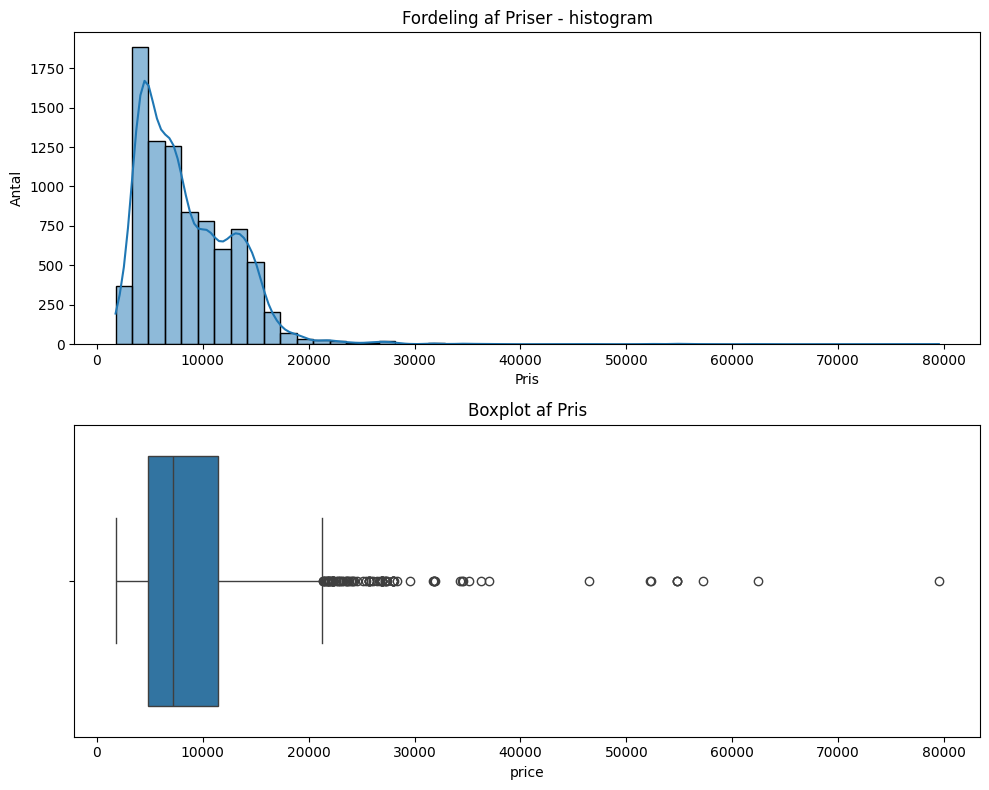

Skævhed (Skewness): 2.24303381701942
Kurtosis: 17.0167794296372
Fordelingen er højreskæv (positiv skævhed).
Fordelingen er spidsere end en normalfordeling (høj kurtosis).


In [27]:
from scipy.stats import skew, kurtosis  

plt.figure(figsize=(10, 8))

# Histogram med KDE øverst
plt.subplot(2, 1, 1)
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Fordeling af Priser - histogram')
plt.ylabel('Antal')
plt.xlabel('Pris')

# Boxplot nederst
plt.subplot(2, 1, 2)
sns.boxplot(x=df['price'])
plt.title('Boxplot af Pris')

plt.tight_layout()
plt.show()

# Beregning af skævhed og kurtosis
skewness = skew(df['price'].dropna())
kurt = kurtosis(df['price'].dropna())

print(f"Skævhed (Skewness): {skewness}")
print(f"Kurtosis: {kurt}")

if skewness > 0:
    print("Fordelingen er højreskæv (positiv skævhed).")
elif skewness < 0:
    print("Fordelingen er venstreskæv (negativ skævhed).")
else:
    print("Fordelingen er symmetrisk.")

if kurt > 3:
    print("Fordelingen er spidsere end en normalfordeling (høj kurtosis).")
elif kurt < 3:
    print("Fordelingen er fladere end en normalfordeling (lav kurtosis).")
else:
    print("Fordelingen har samme spidshed som en normalfordeling.")


Fordelingen er højreskæv (positiv skævhed), hvilket betyder, at der er flere lavere værdier, og den højre hale af fordelingen er længere.

Fordelingen har også høj kurtosis, hvilket indikerer, at dataene er spidsere end en normalfordeling, og der er flere ekstreme værdier (outliers) end vi ville forvente i en normalfordeling. Dette tyder på, at vores data kan indeholde nogle ekstreme observationer, som vi vil fjerne ved hjælp af z-score og IQR teknikkerne for at forbedre modellens præcision.

In [29]:
from datarenser import get_no_outliers_df_train

# Fjerner både IQR‑outliers og z-score‑outliers med et metodekald
df_final = get_no_outliers_df_train(df)

# Tjekker dimensioner før/efter
print(f"Før outlier-fjernelse: {df.shape}")
print(f"Efter outlier-fjernelse: {df_final.shape}")

Før outlier-fjernelse: (8682, 8)
Efter outlier-fjernelse: (8578, 8)


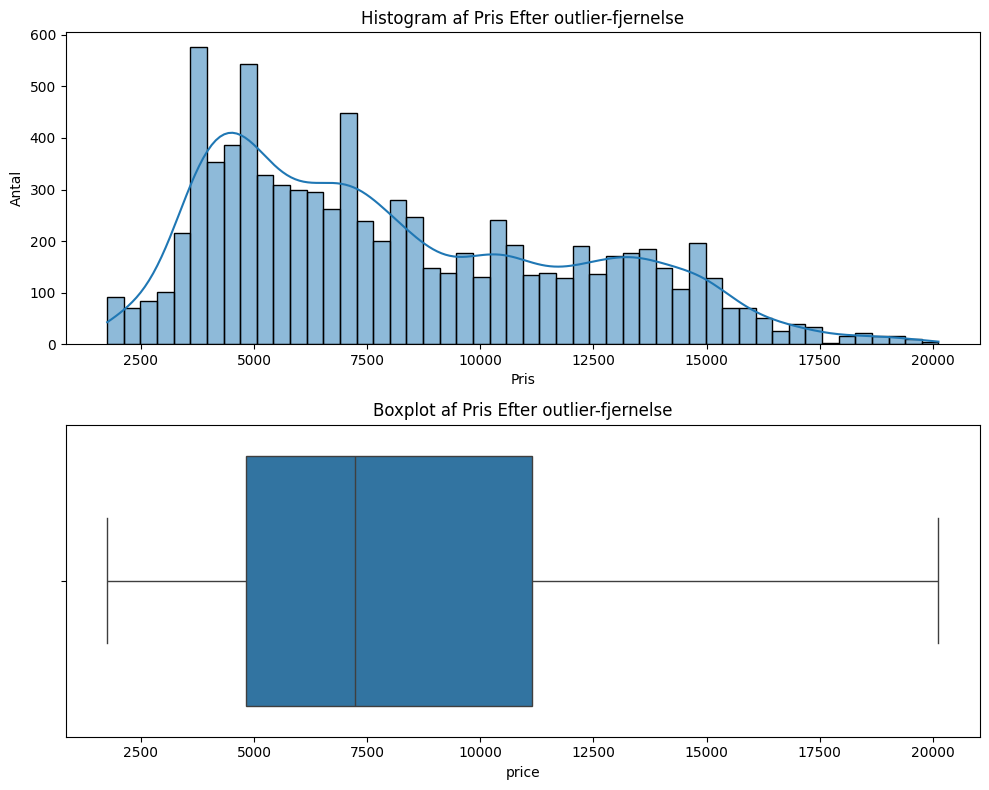

Skævhed (Skewness): 0.60
Kurtosis: -0.62
Fordelingen er højreskæv (positiv skævhed).
Fordelingen er fladere end en normalfordeling (lav kurtosis).


In [30]:
from scipy.stats import skew, kurtosis  

plt.figure(figsize=(10, 8))

# Histogram efter outlier-fjernelse
plt.subplot(2, 1, 1)
sns.histplot(df_final['price'], kde=True, bins=50)
plt.title('Histogram af Pris Efter outlier-fjernelse')
plt.xlabel('Pris')
plt.ylabel('Antal')

# Boxplot efter outlier-fjernelse
plt.subplot(2, 1, 2)
sns.boxplot(x=df_final['price'])
plt.title('Boxplot af Pris Efter outlier-fjernelse')

plt.tight_layout()
plt.show()

# Beregning af skævhed og kurtosis efter outlier-fjernelse
skewness_after = skew(df_final['price'].dropna())
kurt_after = kurtosis(df_final['price'].dropna())

print(f"Skævhed (Skewness): {skewness_after:.2f}")
print(f"Kurtosis: {kurt_after:.2f}")

if skewness_after > 0:
    print("Fordelingen er højreskæv (positiv skævhed).")
elif skewness_after < 0:
    print("Fordelingen er venstreskæv (negativ skævhed).")
else:
    print("Fordelingen er symmetrisk.")

if kurt_after > 3:
    print("Fordelingen er spidsere end en normalfordeling (høj kurtosis).")
elif kurt_after < 3:
    print("Fordelingen er fladere end en normalfordeling (lav kurtosis).")
else:
    print("Fordelingen har samme spidshed som en normalfordeling.")

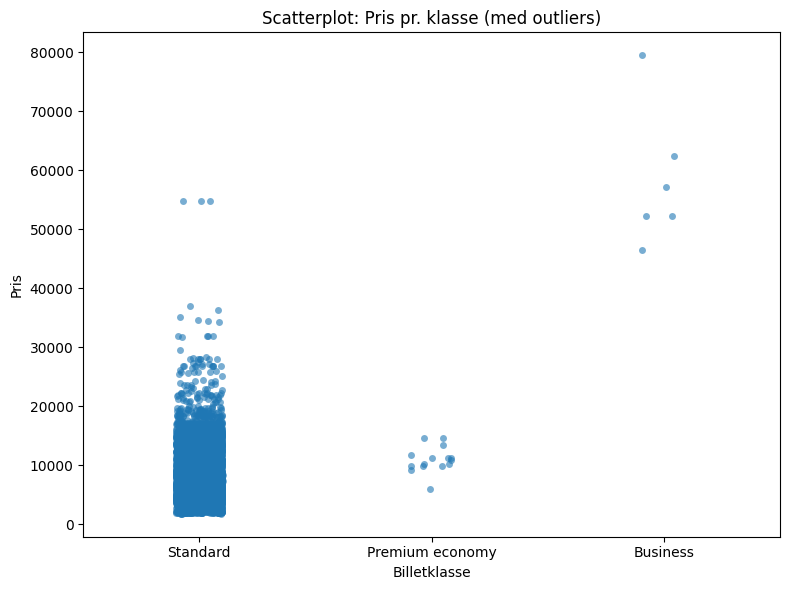

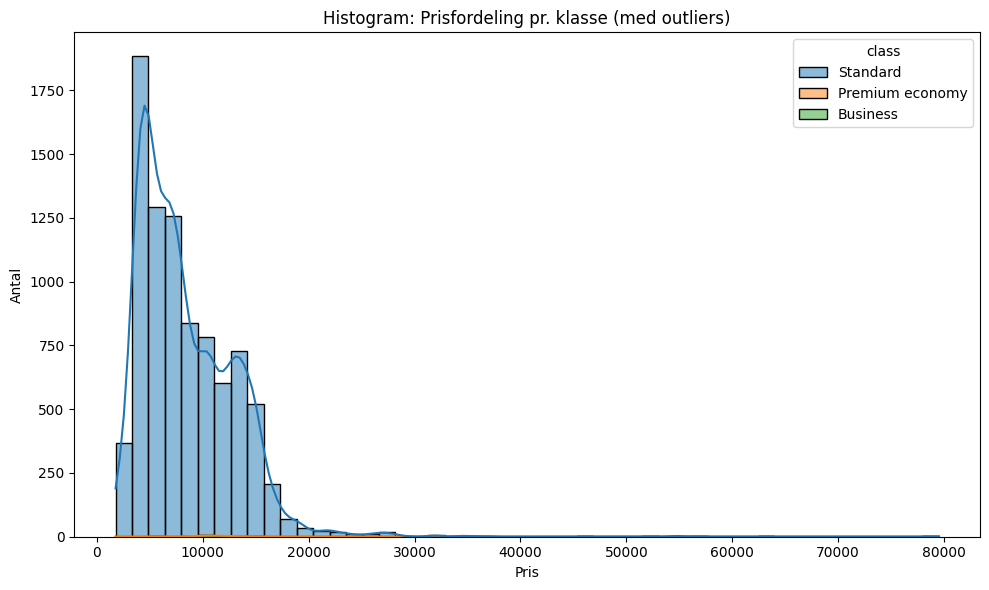

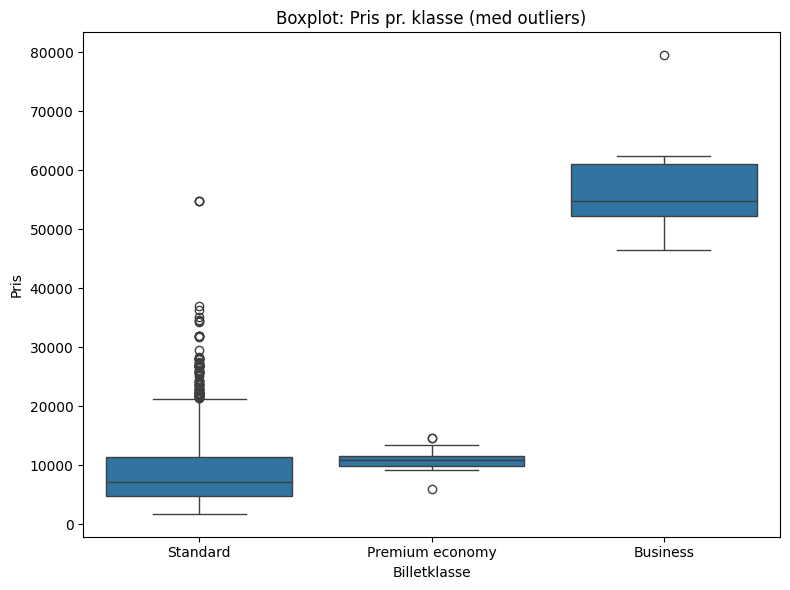

Gennemsnitspriser pr. klasse (med outliers):
Standard: 8395.81
Premium economy: 10937.53
Business: 58358.67


In [31]:
# Scatterplot: price vs class
plt.figure(figsize=(8, 6))
sns.stripplot(data=df, x='class', y='price', jitter=True, alpha=0.6)
plt.title('Scatterplot: Pris pr. klasse (med outliers)')
plt.xlabel('Billetklasse')
plt.ylabel('Pris')
plt.tight_layout()
plt.show()

# Histogram: prisfordeling pr. klasse
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', hue='class', bins=50, kde=True, multiple='stack')
plt.title('Histogram: Prisfordeling pr. klasse (med outliers)')
plt.xlabel('Pris')
plt.ylabel('Antal')
plt.tight_layout()
plt.show()

# Boxplot: Pris pr. klasse
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='class', y='price')
plt.title('Boxplot: Pris pr. klasse (med outliers)')
plt.xlabel('Billetklasse')
plt.ylabel('Pris')
plt.tight_layout()
plt.show()

# Beregner og udskriver gennemsnitspriser pr. klasse sorteret i stigende rækkefølge med outliers
mean_prices = df.groupby('class')['price'].mean().sort_values()

print("Gennemsnitspriser pr. klasse (med outliers):")
for klasse, pris in mean_prices.items():
    print(f"{klasse}: {pris:.2f}")


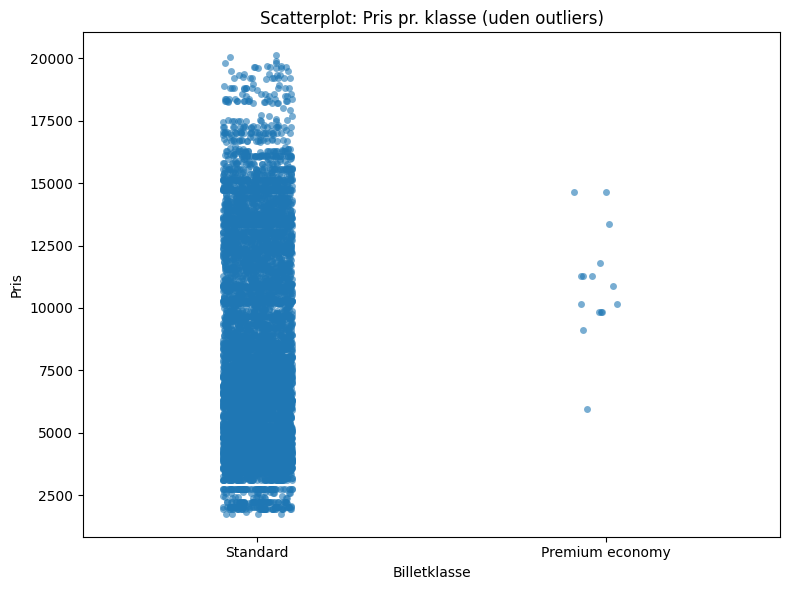

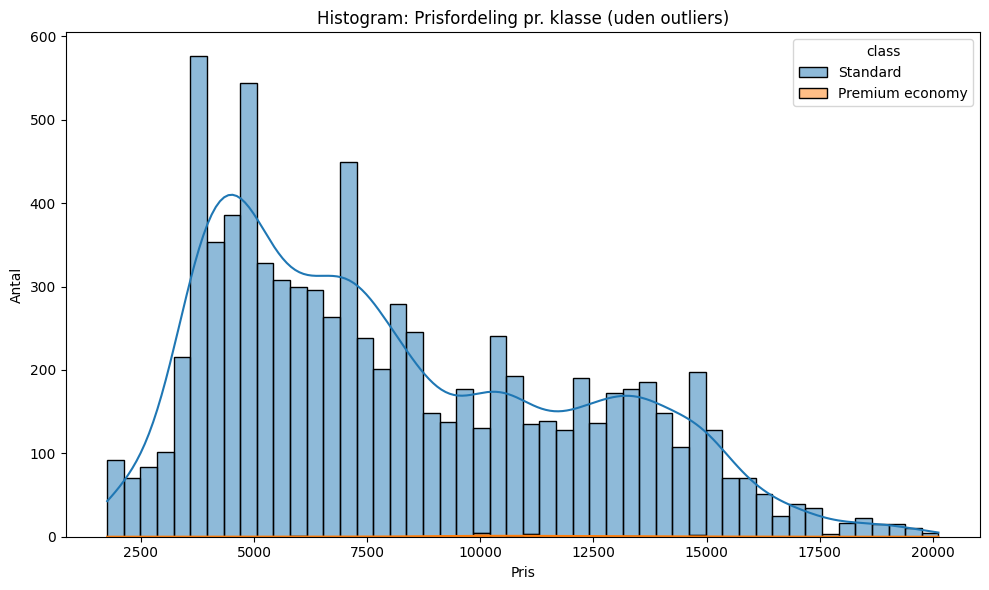

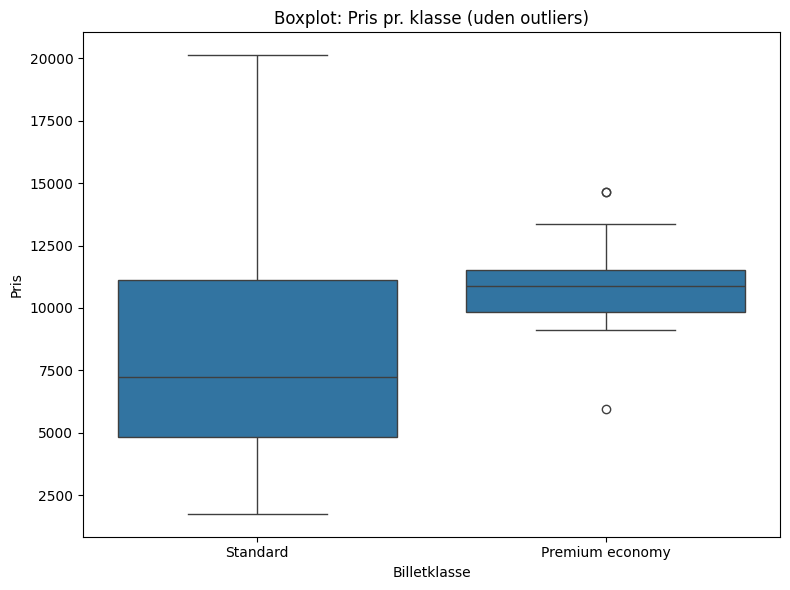

Gennemsnitspriser pr. klasse (uden outliers):
Standard: 8193.79
Premium economy: 10937.53


In [32]:
# Scatterplot: price vs class
plt.figure(figsize=(8, 6))
sns.stripplot(data=df_final, x='class', y='price', jitter=True, alpha=0.6)
plt.title('Scatterplot: Pris pr. klasse (uden outliers)')
plt.xlabel('Billetklasse')
plt.ylabel('Pris')
plt.tight_layout()
plt.show()

# Histogram: prisfordeling pr. klasse
plt.figure(figsize=(10, 6))
sns.histplot(data=df_final, x='price', hue='class', bins=50, kde=True, multiple='stack')
plt.title('Histogram: Prisfordeling pr. klasse (uden outliers)')
plt.xlabel('Pris')
plt.ylabel('Antal')
plt.tight_layout()
plt.show()

# Boxplot: Pris pr. klasse
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_final, x='class', y='price')
plt.title('Boxplot: Pris pr. klasse (uden outliers)' )
plt.xlabel('Billetklasse')
plt.ylabel('Pris')
plt.tight_layout()
plt.show()

# Beregner og udskriver gennemsnitspriser pr. klasse sorteret i stigende rækkefølge uden outliers
mean_prices = df_final.groupby('class')['price'].mean().sort_values()

print("Gennemsnitspriser pr. klasse (uden outliers):")
for klasse, pris in mean_prices.items():
    print(f"{klasse}: {pris:.2f}")


Under analysen blev Business-klassen fjernet som outliers på grund af deres naturligt højere priser sammenlignet med de øvrige klasser. Da disse priser er væsentlige for forståelsen af prisstrukturen, har vi valgt ikke at fjerne disse outliers for at bevare vigtig information. Derfor fortsætter vi analysen med datasættet inklusive outliers, så vi bedre kan afspejle, at Business-klassen har en højere pris end standardversionerne inden for samme flyselskab.

Resultatet viser tydeligt, at priserne varierer betydeligt mellem standard og premium-versionerne inden for samme flyselskab.

Gennemsnitsprisen for standardklassen ligger omkring 8.396, mens Premium Economy har en højere gennemsnitspris på cirka 10.938. Dette indikerer, at Premium Economy tilbyder ekstra komfort eller services, som reflekteres i den højere pris.

Business-klassen skiller sig markant ud med en gennemsnitspris på hele 58.359, hvilket er væsentligt højere end både standard og Premium Economy. Dette understreger, at Business er en premium-version med en betydeligt højere pris, som afspejler dens luksus og ekstra ydelser.

Sammenfattende viser analysen, at premium-versionerne, især Business-klassen, har en markant højere pris end standardversionerne, hvilket bekræfter, at prisniveauet stiger i takt med billetklassens premium-status inden for samme flyselskab.

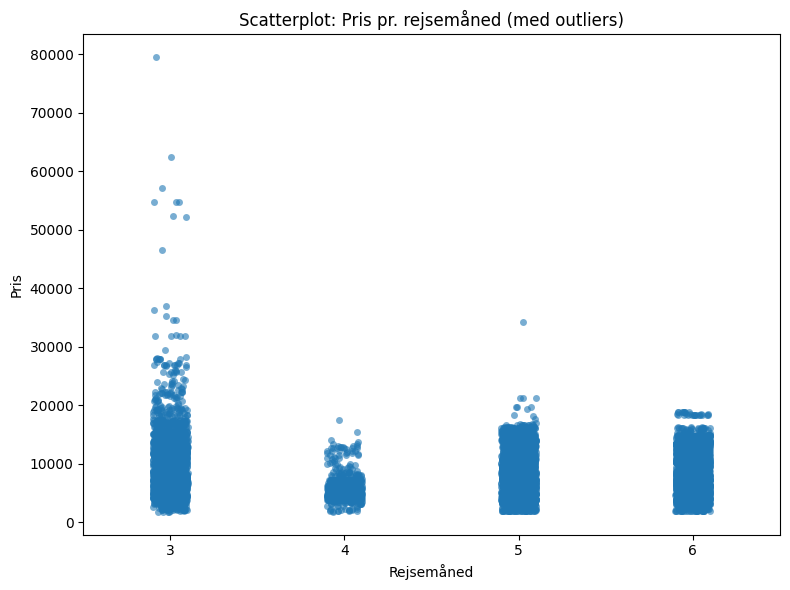

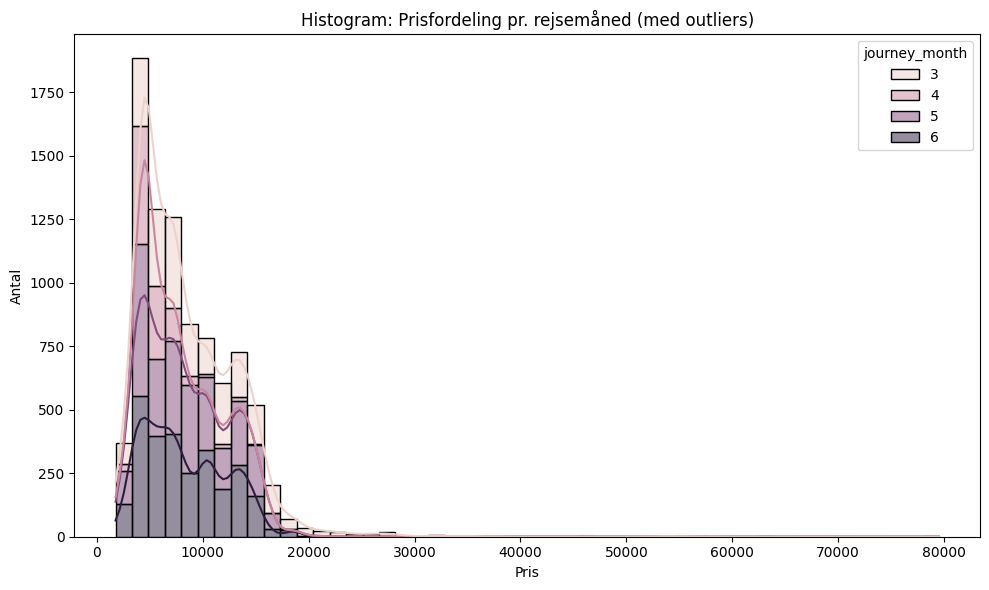

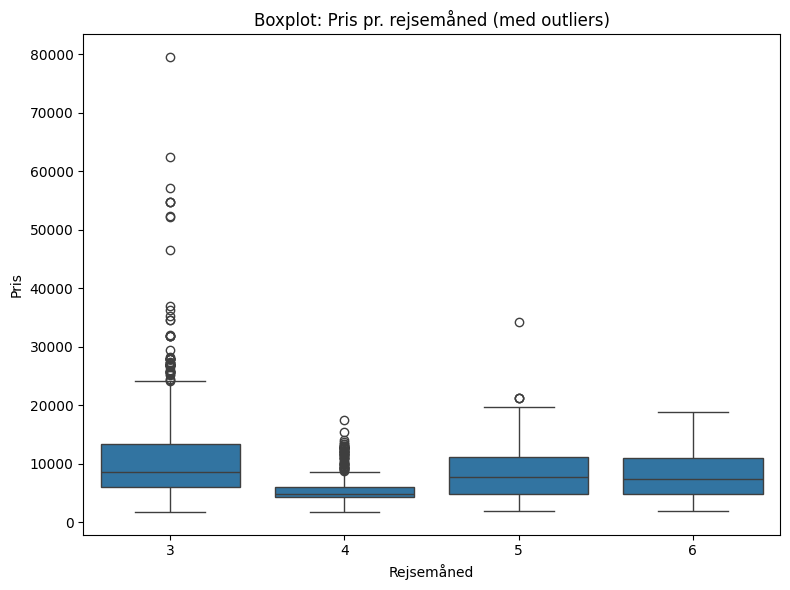

Gennemsnitspriser pr. rejsemåned (med outliers):
3: 10134.81
4: 5471.87
5: 8333.68
6: 8229.98


In [35]:
# Scatterplot: price vs journey_month
plt.figure(figsize=(8, 6))
sns.stripplot(data=df, x='journey_month', y='price', jitter=True, alpha=0.6)
plt.title('Scatterplot: Pris pr. rejsemåned (med outliers)')
plt.xlabel('Rejsemåned')
plt.ylabel('Pris')
plt.tight_layout()
plt.show()

# Histogram: prisfordeling pr. rejsemåned
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', hue='journey_month', bins=50, kde=True, multiple='stack')
plt.title('Histogram: Prisfordeling pr. rejsemåned (med outliers)')
plt.xlabel('Pris')
plt.ylabel('Antal')
plt.tight_layout()
plt.show()

# Boxplot: Pris pr. rejsemåned
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='journey_month', y='price')
plt.title('Boxplot: Pris pr. rejsemåned (med outliers)')
plt.xlabel('Rejsemåned')
plt.ylabel('Pris')
plt.tight_layout()
plt.show()

mean_prices = df.groupby('journey_month')['price'].mean().sort_index()

print("Gennemsnitspriser pr. rejsemåned (med outliers):")
for month, pris in mean_prices.items():
    print(f"{month}: {pris:.2f}")

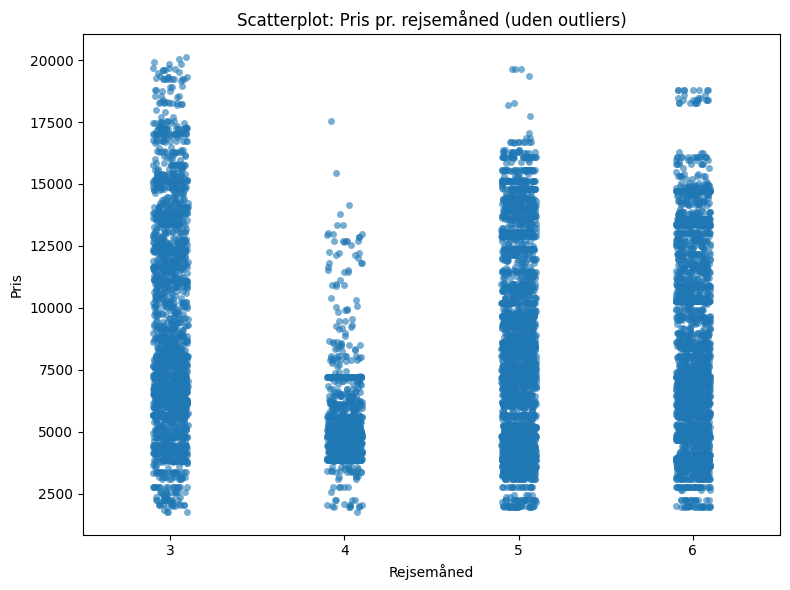

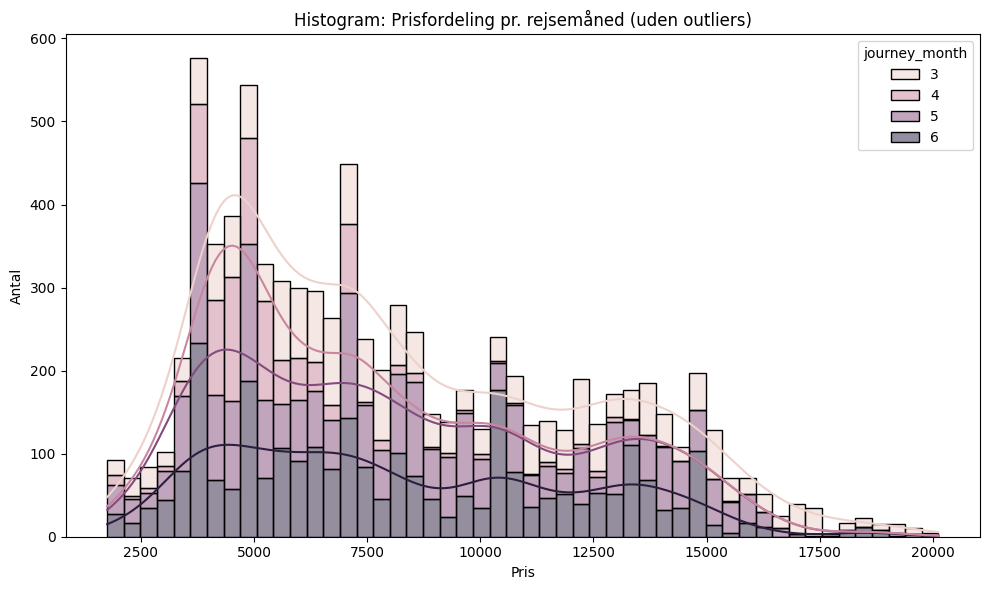

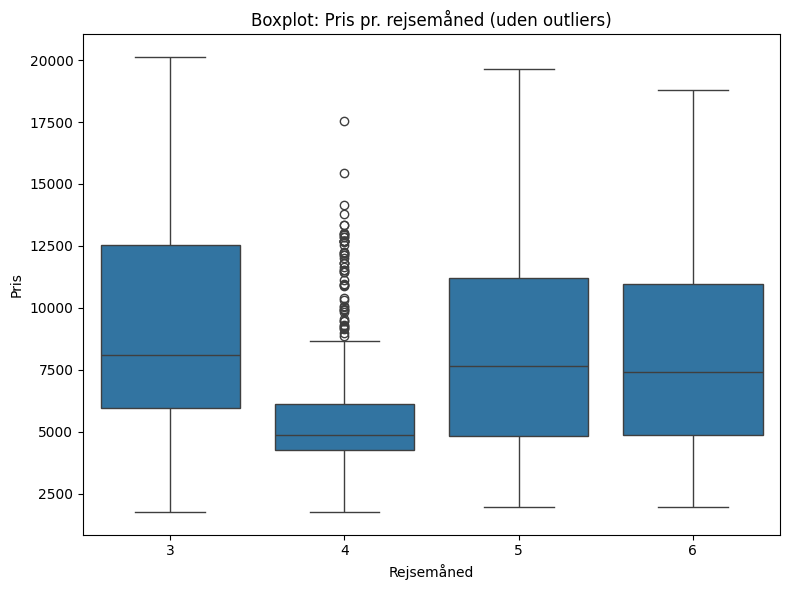

Gennemsnitspriser pr. rejsemåned (uden outliers):
3: 9286.19
4: 5471.87
5: 8309.96
6: 8229.98


In [36]:
# Scatterplot: price vs journey_month
plt.figure(figsize=(8, 6))
sns.stripplot(data=df_final, x='journey_month', y='price', jitter=True, alpha=0.6)
plt.title('Scatterplot: Pris pr. rejsemåned (uden outliers)')
plt.xlabel('Rejsemåned')
plt.ylabel('Pris')
plt.tight_layout()
plt.show()

# Histogram: prisfordeling pr. rejsemåned
plt.figure(figsize=(10, 6))
sns.histplot(data=df_final, x='price', hue='journey_month', bins=50, kde=True, multiple='stack')
plt.title('Histogram: Prisfordeling pr. rejsemåned (uden outliers)')
plt.xlabel('Pris')
plt.ylabel('Antal')
plt.tight_layout()
plt.show()

# Boxplot: Pris pr. rejsemåned
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_final, x='journey_month', y='price')
plt.title('Boxplot: Pris pr. rejsemåned (uden outliers)')
plt.xlabel('Rejsemåned')
plt.ylabel('Pris')
plt.tight_layout()
plt.show()

# Gennemsnitspriser pr. rejsemåned
mean_prices = df_final.groupby('journey_month')['price'].mean().sort_index()

print("Gennemsnitspriser pr. rejsemåned (uden outliers):")
for month, pris in mean_prices.items():
    print(f"{month}: {pris:.2f}")

Priserne varierer tydeligt afhængigt af rejsemåneden. Den laveste gennemsnitspris findes i april (måned 4) med cirka 5.472, hvilket tyder på, at det er en mere økonomisk måned at rejse i. Priserne stiger markant i maj og juni (måneder 5 og 6) til omkring 8.300-8.230, hvilket indikerer øget efterspørgsel eller sæsonbestemte prisstigninger i disse måneder. Den højeste gennemsnitspris observeres i marts (måned 3) med cirka 9.286 uden outliers og endnu højere (ca. 10.135) når outliers inkluderes. Dette antyder, at rejser i marts generelt er dyrere, muligvis grundet ferieperioder eller andre faktorer, der påvirker efterspørgslen. 

Samlet set viser analysen, at rejsemåneden har en væsentlig indflydelse på prisniveauet især skiller marts sig ud som den dyreste måned, mens april fremstår som den billigste.

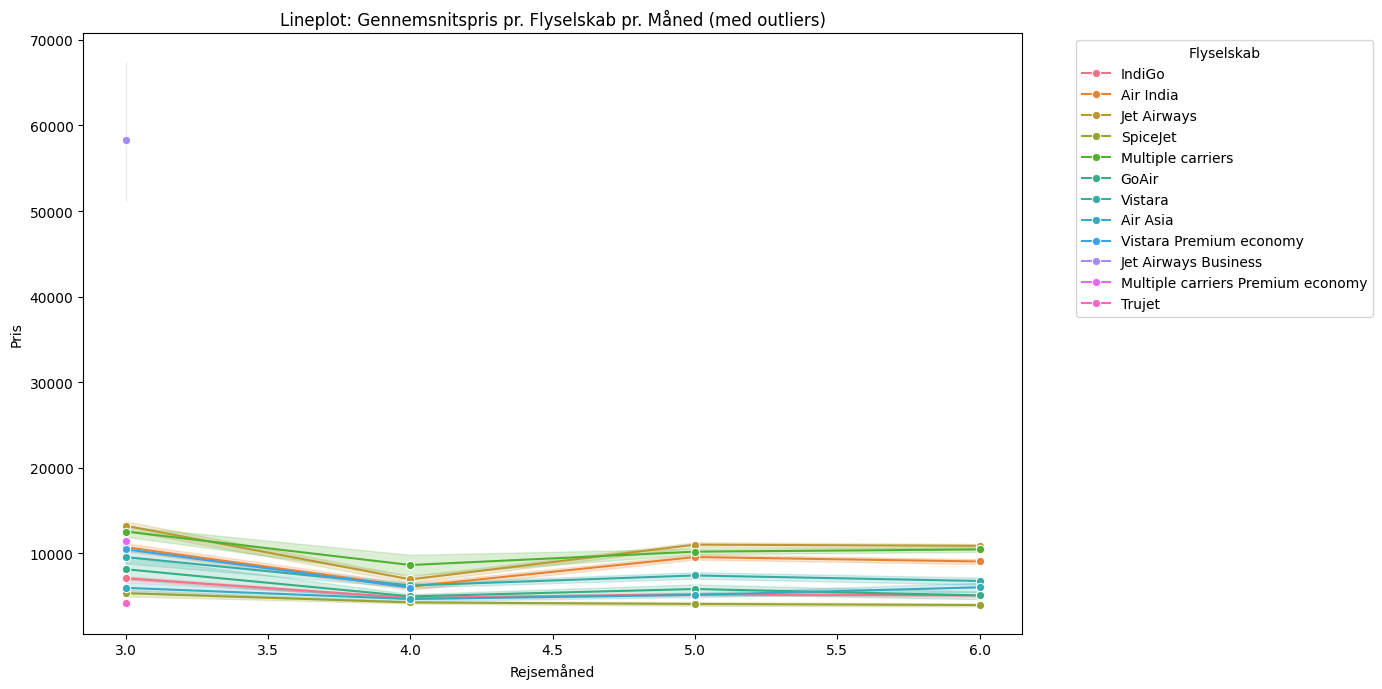

In [38]:
# Lineplot: Prisudvikling pr. flyselskab over rejsemåneder med outliers inkluderet
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='journey_month', y='price', hue='airline', marker='o')
plt.title('Lineplot: Gennemsnitspris pr. Flyselskab pr. Måned (med outliers)')
plt.xlabel('Rejsemåned')
plt.ylabel('Pris')
plt.legend(title='Flyselskab', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

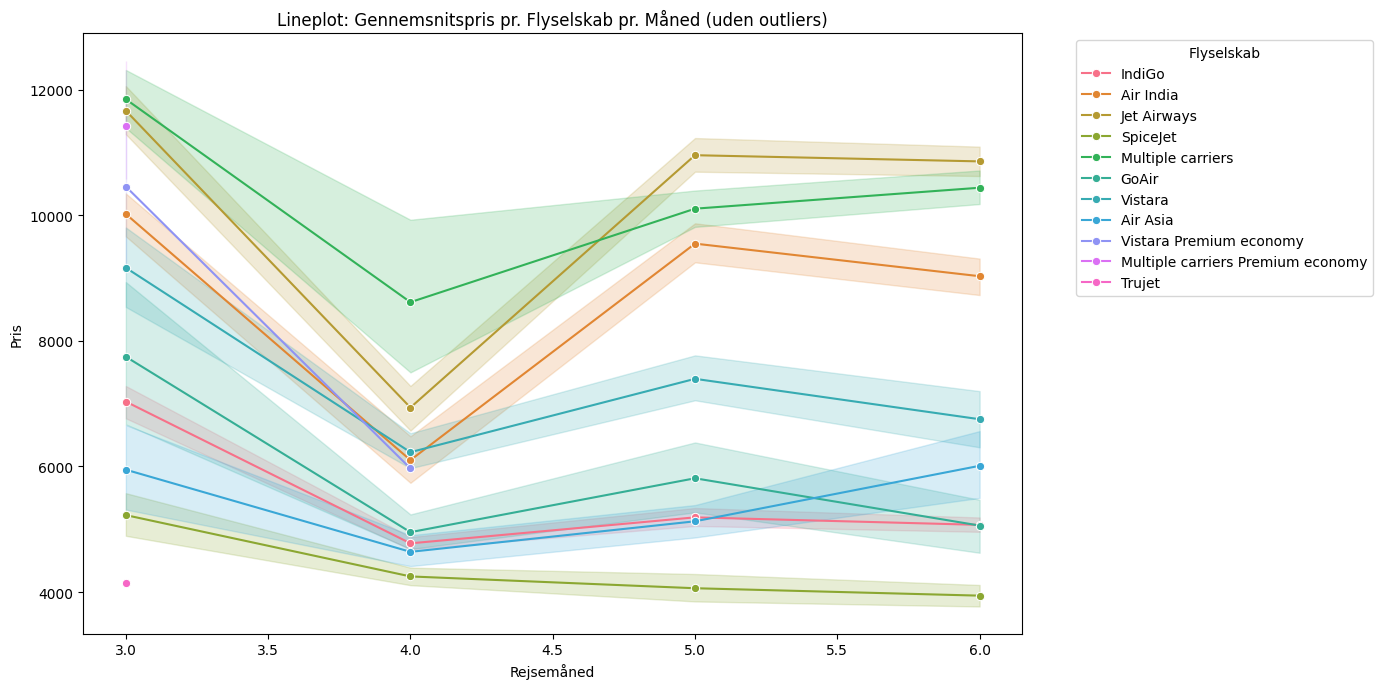

In [39]:
# Lineplot: Prisudvikling pr. flyselskab over rejsemåneder uden outliers
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_final, x='journey_month', y='price', hue='airline', marker='o')
plt.title('Lineplot: Gennemsnitspris pr. Flyselskab pr. Måned (uden outliers)')
plt.xlabel('Rejsemåned')
plt.ylabel('Pris')
plt.legend(title='Flyselskab', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

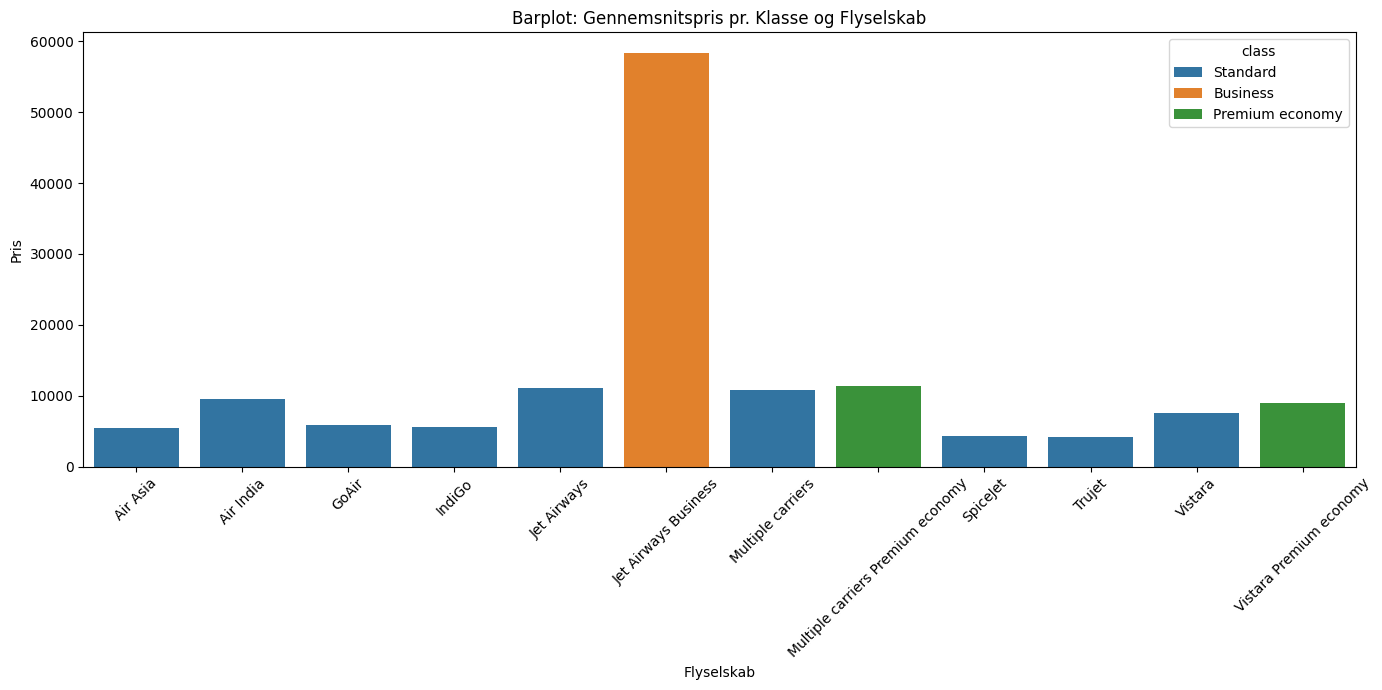

In [40]:
# Barplot: Gennemsnitspris pr. klasse og flyselskab
mean_prices_per_class = df.groupby(['airline', 'class'])['price'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=mean_prices_per_class, x='airline', y='price', hue='class')
plt.title('Barplot: Gennemsnitspris pr. Klasse og Flyselskab')
plt.ylabel('Pris')
plt.xlabel('Flyselskab')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

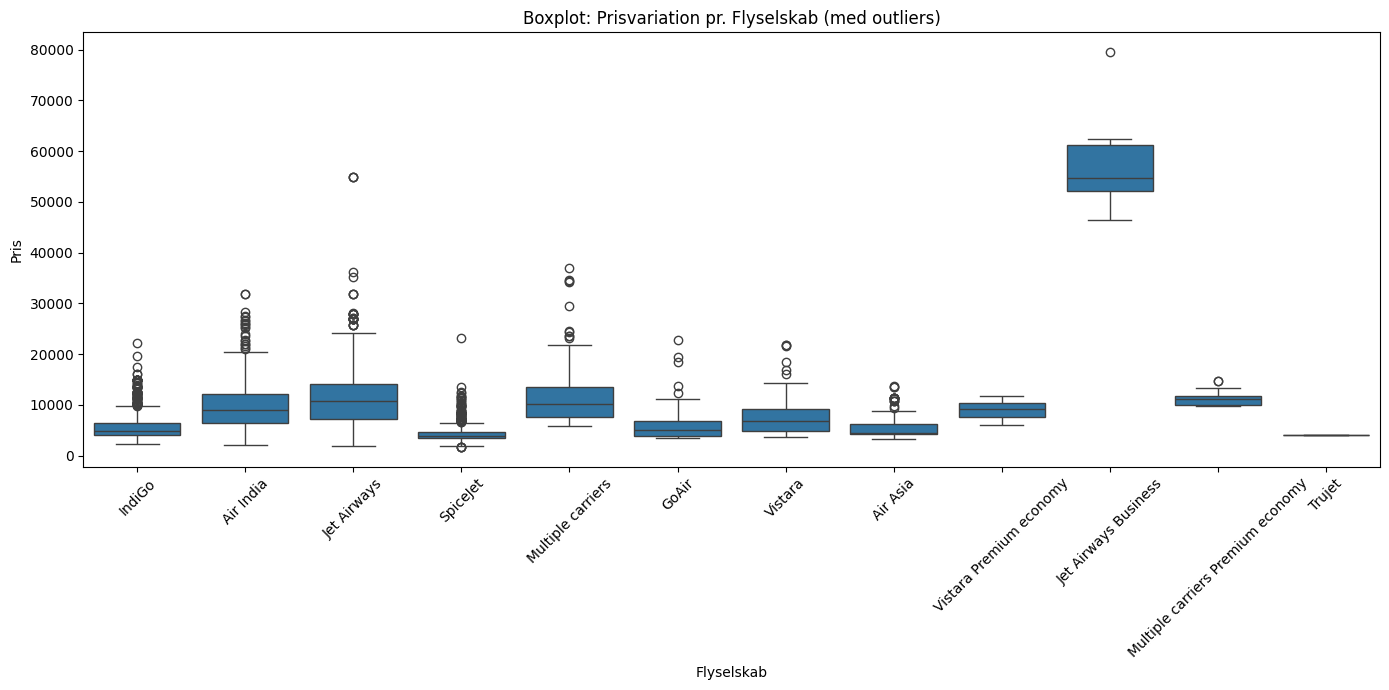

In [41]:
# Boxplot: Prisvariation pr. flyselskab med outliers
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='airline', y='price')
plt.title('Boxplot: Prisvariation pr. Flyselskab (med outliers)')
plt.xlabel('Flyselskab')
plt.ylabel('Pris')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

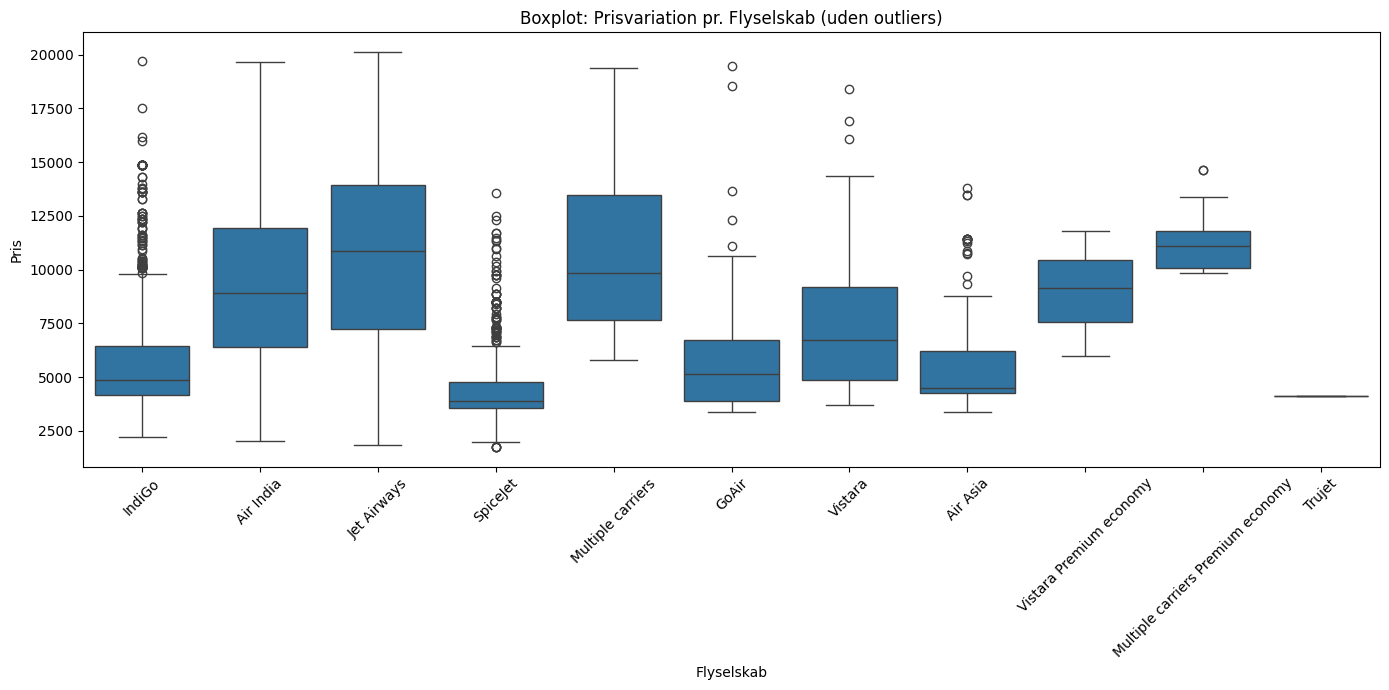

In [42]:
# Boxplot: Prisvariation pr. flyselskab uden outliers
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_final, x='airline', y='price')
plt.title('Boxplot: Prisvariation pr. Flyselskab (uden outliers)')
plt.xlabel('Flyselskab')
plt.ylabel('Pris')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

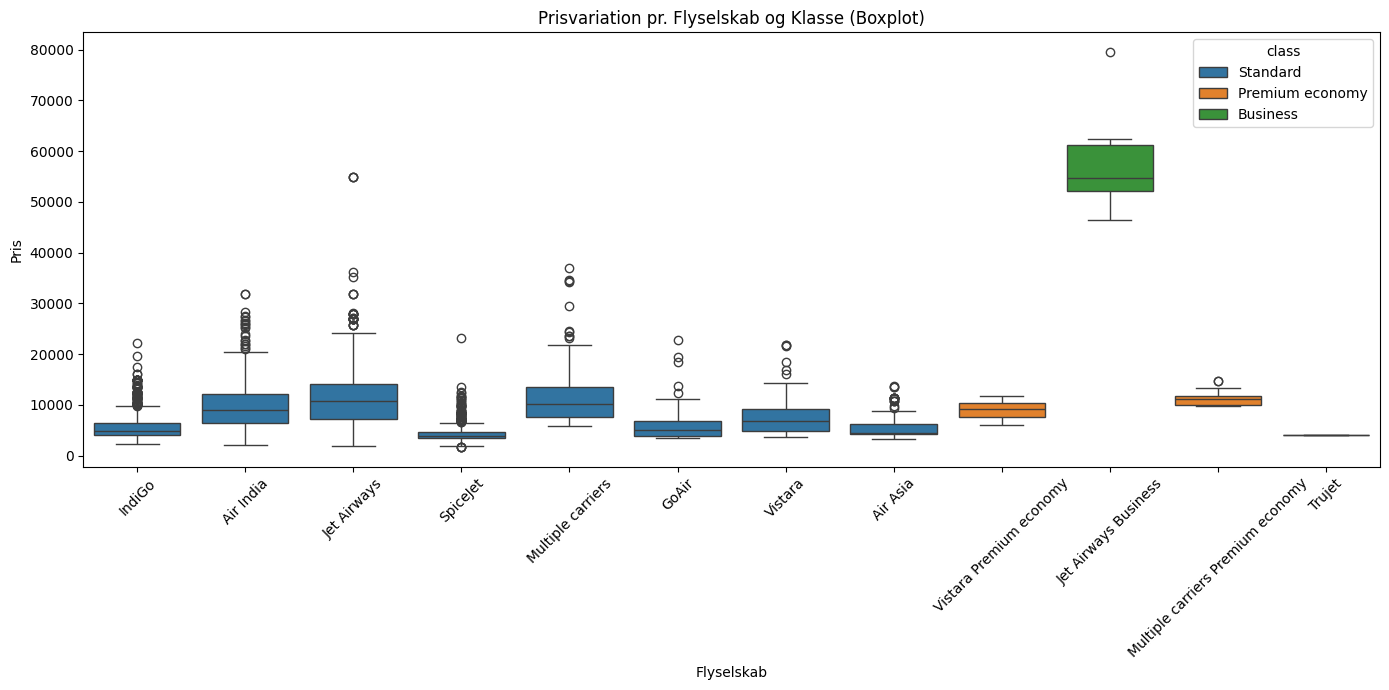

In [43]:
# Boxplot: Prisvariation pr. flyselskab og klasse (med outliers)
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='airline', y='price', hue='class')
plt.title('Prisvariation pr. Flyselskab og Klasse (Boxplot)')
plt.xlabel('Flyselskab')
plt.ylabel('Pris')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Valgte kolonner til korrelationsanalyse: ['price', 'class_numb']
Beregnet korrelationsmatrix:
               price  class_numb
price       1.000000    0.237835
class_numb  0.237835    1.000000


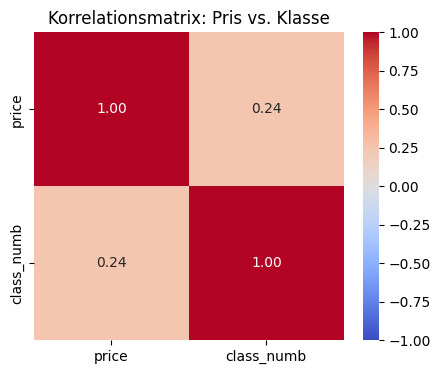

In [44]:
# Vælger de relevante kolonner til korrelationsanalyse: pris og den omkodede klasse
cols_to_corr = ['price', 'class_numb']
print("Valgte kolonner til korrelationsanalyse:", cols_to_corr)

# Beregner korrelationsmatrix for valgte variabler
corr = df[cols_to_corr].corr()
print("Beregnet korrelationsmatrix:")
print(corr)

# Visualiserer korrelationsmatrixen som heatmap
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Korrelationsmatrix: Pris vs. Klasse")
plt.show()

Korrelationsmatrixen viser en svag til moderat positiv sammenhæng på omkring 0,24 mellem pris og flyklasse (class_numb). Det indikerer, at prisen typisk øges, jo højere klassen er (Standard < Premium economy < Business), men denne relation er ikke særlig stærk. Det tyder på, at der også er andre faktorer, der spiller ind på prisen.

In [46]:
avg_prices = df.groupby(['airline', 'class'])['price'].mean().unstack()
print("\nGennemsnitspriser pr. flyselskab og klasse:")
print(avg_prices)


Gennemsnitspriser pr. flyselskab og klasse:
class                                  Business  Premium economy      Standard
airline                                                                       
Air Asia                                    NaN              NaN   5439.607639
Air India                                   NaN              NaN   9462.014075
GoAir                                       NaN              NaN   5861.056701
IndiGo                                      NaN              NaN   5592.643539
Jet Airways                                 NaN              NaN  11114.544343
Jet Airways Business               58358.666667              NaN           NaN
Multiple carriers                           NaN              NaN  10856.087273
Multiple carriers Premium economy           NaN     11431.333333           NaN
SpiceJet                                    NaN              NaN   4335.841718
Trujet                                      NaN              NaN   4140.000000
Vistara

Gennemsnittene bekræfter, at Business class generelt har de højeste priser, efterfulgt af Premium economy, mens Standard class er billigst. Dog er der flyselskaber, som kun tilbyder visse klasser i datasættet, hvilket fremgår af NaN-værdierne. Eksempelvis har 'Jet Airways Business' kun Business klasse-data, mens 'Vistara Premium economy' kun har Premium economy-priser. Standard klassen er tilgængelig på alle flyselskaber og har de laveste gennemsnitspriser.

Korrelationsmatrix mellem pris og rejsemåned:
                  price  journey_month
price          1.000000      -0.110887
journey_month -0.110887       1.000000


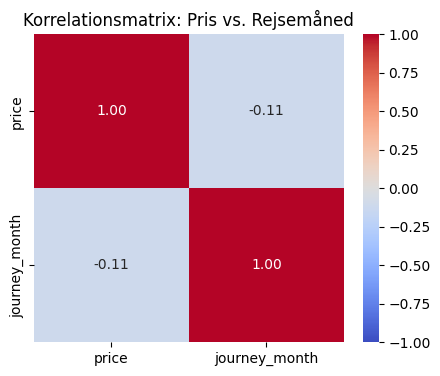

In [48]:
# Udvælgelse af kolonner til korrelationsanalyse: pris og rejsemåned
cols_to_corr = ['price', 'journey_month']

# Beregn korrelationsmatrix
corr = df[['price', 'journey_month']].corr()

# Udskriv korrelation
print("Korrelationsmatrix mellem pris og rejsemåned:")
print(corr)

# Visualiser som heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Korrelationsmatrix: Pris vs. Rejsemåned")
plt.show()

Der er udvalgt kolonnerne price og journey_month for at undersøge sammenhængen mellem pris og rejsemåned. Korrelationsmatrixen viser en svag negativ korrelation på omkring -0,11, hvilket antyder, at priserne i gennemsnit falder en smule fra marts til juni.

Selvom der er en svag tendens til lavere priser i de senere måneder, er korrelationen så lav, at rejsemåneden alene næsten ingen betydning har for prisvariationerne.

Korrelationsmatrix:
                  price  class_numb  journey_month  airline_numb
price          1.000000    0.237835      -0.110887      0.088127
class_numb     0.237835    1.000000      -0.066114      0.175117
journey_month -0.110887   -0.066114       1.000000      0.034299
airline_numb   0.088127    0.175117       0.034299      1.000000


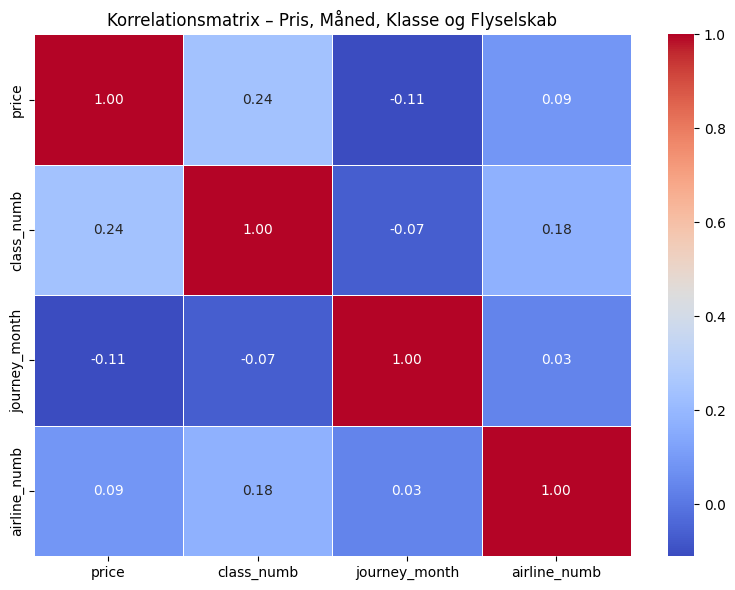

In [50]:
# Udvælger relevante numeriske kolonner
corr_df = df[['price', 'class_numb', 'journey_month', 'airline_numb']]

# Beregner korrelationer mellem de udvalgte variabler
corr = corr_df.corr()

# Printer korrelationsmatrixen
print("Korrelationsmatrix:")
print(corr)

# Visualiserer korrelationerne med heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korrelationsmatrix – Pris, Måned, Klasse og Flyselskab')
plt.tight_layout()
plt.show()

Korrelationsmatrixen viser, at der er en svag negativ sammenhæng mellem pris og rejsemåned (-0,11). Dette indikerer, at priserne generelt falder en smule over månederne 3 til 6, men sammenhængen er ikke stærk eller lineær. Faktisk ses fra gennemsnitspriserne, at prisen falder markant i april (måned 4), men derefter stiger igen i maj og juni. Denne uregelmæssige variation gør, at korrelationskoefficienten kun fanger en svag lineær tendens.

Derudover viser matrixen en moderat positiv sammenhæng mellem pris og klasse (0,24), hvilket tyder på, at højere klasser (f.eks. Business) generelt har højere priser. Sammenhængen mellem pris og flyselskab er svag positiv (0,09), hvilket antyder, at priserne varierer lidt afhængigt af flyselskabet, men denne effekt er begrænset.

Kort sagt afspejler korrelationsmatrixen, at prisvariationerne i højere grad er påvirket af klassen end af rejsemåneden eller flyselskabet, og at prisudviklingen over rejsemånederne ikke følger et simpelt lineært mønster.

In [52]:
mean_std_by_airline = df.groupby('airline')['price'].agg(['mean', 'std']).sort_values(by='mean', ascending=False)
print("Gennemsnitspris og standardafvigelse pr. flyselskab:\n")
print(mean_std_by_airline)

Gennemsnitspris og standardafvigelse pr. flyselskab:

                                           mean           std
airline                                                      
Jet Airways Business               58358.666667  11667.596748
Multiple carriers Premium economy  11431.333333   1792.892195
Jet Airways                        11114.544343   4731.799325
Multiple carriers                  10856.087273   3730.307176
Air India                           9462.014075   3986.562515
Vistara Premium economy             8962.333333   2915.405518
Vistara                             7532.784360   2946.985222
GoAir                               5861.056701   2703.585767
IndiGo                              5592.643539   2180.788829
Air Asia                            5439.607639   1991.408972
SpiceJet                            4335.841718   1851.144678
Trujet                              4140.000000           NaN


Analysen af gennemsnitspriser og prisvariationer pr. flyselskab viser tydelige forskelle i både prisniveau og prisudsving på tværs af selskaberne. Jet Airways Business har den højeste gennemsnitspris på omkring 58.359, hvilket afspejler, at det er en premium-klasse med markant højere priser end de øvrige flyselskaber. Andre flyselskaber som Multiple carriers Premium economy og Jet Airways befinder sig også i den højere prisklasse, men med væsentligt lavere gennemsnitspriser. I den lave ende finder vi flyselskaber som SpiceJet og Trujet, der har gennemsnitspriser under 5.000. Ved at se på standardafvigelsen, som angiver prisvariation, konstateres det, at Jet Airways Business har en stor prisvariation, hvilket kan skyldes forskellige prisstrategier eller sæsonbestemte udsving. Flyselskaber med lavere standardafvigelse har derimod mere stabile priser. Resultatet af denne analyse giver værdifuld indsigt i, hvordan flyselskaber adskiller sig både med hensyn til prisniveau og prisvariation, og udgør et solidt grundlag for videre segmentering og clustering.

In [54]:
from sklearn.preprocessing import StandardScaler

# Tjekker for manglende værdier før skalering
print("Manglende værdier før skalering:")
print(dfNumeric[['Price', 'Journey_month']].isnull().sum())

# Standard skalering af 'Price' og 'Journey_month'
scaler = StandardScaler()
dfNumeric[['Price', 'Journey_month']] = scaler.fit_transform(
    dfNumeric[['Price', 'Journey_month']]
)

# Udskriver et udsnit af data efter skalering
print("\nSkalerede numeriske features + one-hot encoded kategorier (første 5 rækker):")
print(dfNumeric.head())

# Tjekker middelværdi og standardafvigelse efter skalering
print("\nMiddelværdi og standardafvigelse efter skalering for 'Price' og 'Journey_month':")
print(dfNumeric[['Price', 'Journey_month']].agg(['mean', 'std']))

Manglende værdier før skalering:
Price            0
Journey_month    0
dtype: int64

Skalerede numeriske features + one-hot encoded kategorier (første 5 rækker):
      Price  Journey_month  Class_Business  Class_Premium economy  \
0 -0.985377      -1.455126               0                      0   
1 -0.167800       0.261836               0                      0   
2  1.182884       1.120316               0                      0   
3 -0.481367       0.261836               0                      0   
4  1.056936      -1.455126               0                      0   

   Class_Standard  Airline_Air Asia  Airline_Air India  Airline_GoAir  \
0               1                 0                  0              0   
1               1                 0                  1              0   
2               1                 0                  0              0   
3               1                 0                  0              0   
4               1                 0                  0    

Middelværdien af de skalerede features ligger tæt på 0 (alle omkring ±0.00000), og standardafvigelsen er cirka 1.00006 for alle variabler. Dette bekræfter, at standardiseringen er udført korrekt, og at data nu er centreret og skaleret ensartet. Der er ingen manglende værdier i de anvendte features. Data er derfor klar til clustering med k-means, som kan bruges til at kategorisere flyselskaber baseret på prisvariationer over rejsemåneden samt forskelle mellem standard og premium-versioner.

# 4. Datamodellering

In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

### Eksempel: Aggregerede statistikker (før clustering) ###
             Price_mean  Price_std  Month_price_std  Pct_standard  \
Airline                                                             
Air Asia      -0.650397   0.432438         0.920853           1.0   
Air India      0.223076   0.865689         1.021056           1.0   
GoAir         -0.558878   0.587089         0.963061           1.0   
IndiGo        -0.617165   0.473562         1.006677           1.0   
Jet Airways    0.581926   1.027519         0.980235           1.0   

             Pct_premium  Pct_business  
Airline                                 
Air Asia             0.0           0.0  
Air India            0.0           0.0  
GoAir                0.0           0.0  
IndiGo               0.0           0.0  
Jet Airways          0.0           0.0   

Silhouette scores for k=[2, 3, 4, 5, 6] → [0.8177663714104036, 0.3799845691368681, 0.5180996791170974, 0.5310215912810093, 0.3389717295093339]
Optimal k: 2



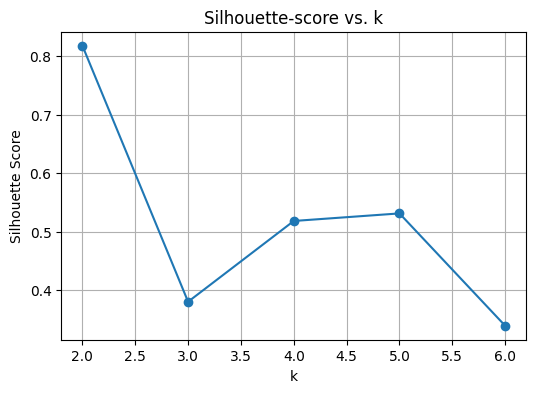

### Antal airlines i hver cluster ###
cluster
0    11
1     1
Name: count, dtype: int64 

### Eksempel: Airlines med deres cluster ###
             Airline  cluster
0           Air Asia        0
6  Multiple carriers        0
1          Air India        0
3             IndiGo        0
8           SpiceJet        0 

### Airlines i cluster 1 ###
                      Price_mean  Price_std  Month_price_std  Pct_standard  \
Airline                                                                      
Jet Airways Business   10.841075    2.53364              0.0           0.0   

                      Pct_premium  Pct_business  cluster  
Airline                                                   
Jet Airways Business          0.0           1.0        1   



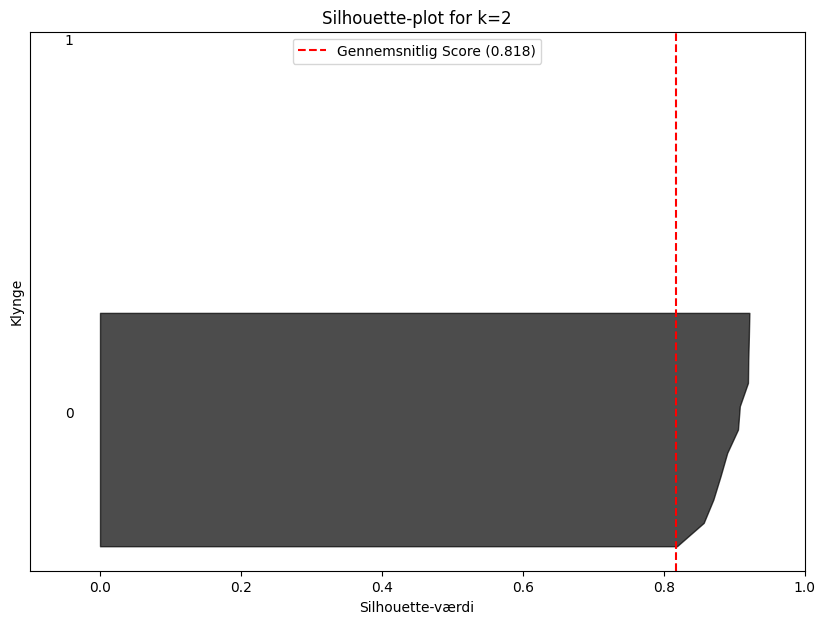

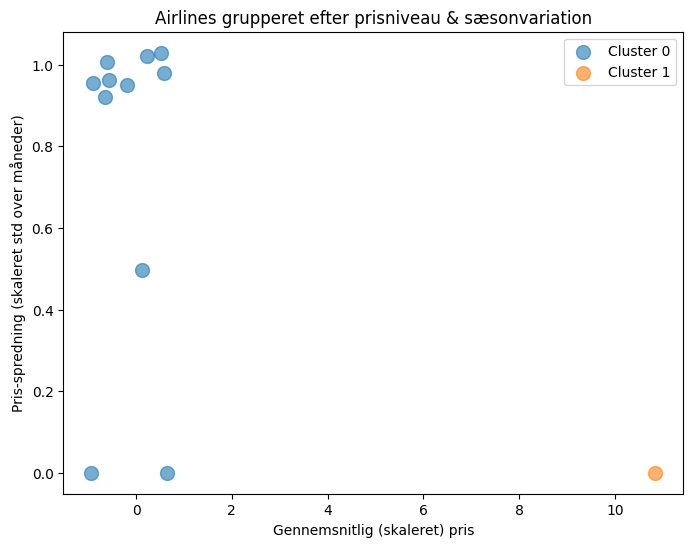

Cluster 0:
  Gennemsnitlig andel Standard: 0.82 (std: 0.40)
  Gennemsnitlig andel Premium economy: 0.18 (std: 0.40)
  Gennemsnitlig andel Business: 0.00 (std: 0.00)

Cluster 1:
  Gennemsnitlig andel Standard: 0.00 (std: N/A)
  Gennemsnitlig andel Premium economy: 0.00 (std: N/A)
  Gennemsnitlig andel Business: 1.00 (std: N/A)



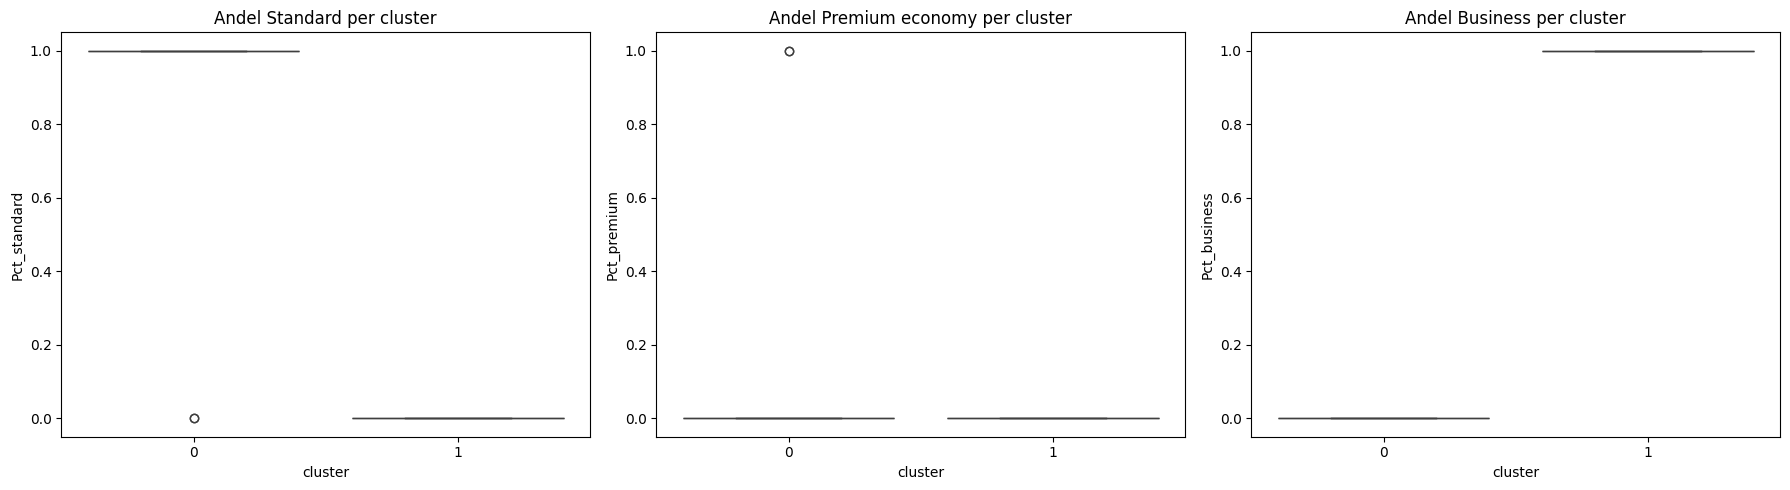

In [58]:
# --- 0) Genskab Airline-kolonnen ud fra one-hot encoded dummy-kolonner ---
airline_cols = [
    'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
    'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
    'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy',
    'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'
]

dfNumeric['Airline'] = dfNumeric[airline_cols].idxmax(axis=1)
dfNumeric['Airline'] = dfNumeric['Airline'].str.replace('Airline_', '', regex=False)

# --- A) Aggregerede statistikker pr. flyselskab (brug skalerede Price og Journey_month fra dfNumeric) ---
agg = dfNumeric.groupby('Airline').agg({
    'Price': ['mean', 'std'],           # Price er allerede skaleret
    'Journey_month': 'std',             # Journey_month er allerede skaleret
    'Class_Standard': 'mean',
    'Class_Premium economy': 'mean',
    'Class_Business': 'mean'
})

agg.columns = [
    'Price_mean', 'Price_std', 'Month_price_std',
    'Pct_standard', 'Pct_premium', 'Pct_business'
]
agg = agg.fillna(0)

print("### Eksempel: Aggregerede statistikker (før clustering) ###")
print(agg.head(), "\n")

# --- B) Find optimalt antal klynger via silhouette scores ---
sil_scores = []
K_range = range(2, 7)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(agg)
    sil_scores.append(silhouette_score(agg, labels))

best_k = K_range[sil_scores.index(max(sil_scores))]
print(f"Silhouette scores for k={list(K_range)} → {sil_scores}")
print(f"Optimal k: {best_k}\n")

plt.figure(figsize=(6,4))
plt.plot(list(K_range), sil_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette-score vs. k')
plt.grid(True)
plt.show()

# --- C) Endelig clustering ---
kmeans = KMeans(n_clusters=best_k, random_state=42)
agg['cluster'] = kmeans.fit_predict(agg)

print("### Antal airlines i hver cluster ###")
print(agg['cluster'].value_counts(), "\n")

print("### Eksempel: Airlines med deres cluster ###")
print(agg.reset_index()[['Airline', 'cluster']].sample(5), "\n")

print("### Airlines i cluster 1 ###")
print(agg[agg['cluster'] == 1], "\n")

# --- D) Silhouette-plot ---
silhouette_vals = silhouette_samples(agg.drop(columns='cluster'), agg['cluster'])

y_lower = 10
plt.figure(figsize=(10, 7))

for i in range(best_k):
    ith_vals = silhouette_vals[agg['cluster'] == i]
    ith_vals.sort()
    size_cluster_i = ith_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / best_k)
    plt.fill_betweenx(
        np.arange(y_lower, y_upper), 0, ith_vals,
        facecolor=color, edgecolor=color, alpha=0.7
    )
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

avg_score = silhouette_score(agg.drop(columns='cluster'), agg['cluster'])
plt.axvline(x=avg_score, color="red", linestyle="--",
            label=f"Gennemsnitlig Score ({avg_score:.3f})")
plt.title(f'Silhouette-plot for k={best_k}')
plt.xlabel('Silhouette-værdi')
plt.ylabel('Klynge')
plt.legend()
plt.yticks([])
plt.xlim([-0.1, 1.0])
plt.show()

# --- E) Visualisering ---

# 1) Scatter: Prisniveau vs. pris-spredning over måneder
plt.figure(figsize=(8,6))
for c in range(best_k):
    sub = agg[agg['cluster'] == c]
    plt.scatter(sub['Price_mean'], sub['Month_price_std'],
                s=100, alpha=0.6, label=f'Cluster {c}')
plt.xlabel('Gennemsnitlig (skaleret) pris')
plt.ylabel('Pris-spredning (skaleret std over måneder)')
plt.title('Airlines grupperet efter prisniveau & sæsonvariation')
plt.legend()
plt.show()

# 2) Boxplots: Andel Standard/Premium/Business pr. cluster
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(x='cluster', y='Pct_standard', data=agg.reset_index(), ax=axes[0])
axes[0].set_title('Andel Standard per cluster')

sns.boxplot(x='cluster', y='Pct_premium', data=agg.reset_index(), ax=axes[1])
axes[1].set_title('Andel Premium economy per cluster')

sns.boxplot(x='cluster', y='Pct_business', data=agg.reset_index(), ax=axes[2])
axes[2].set_title('Andel Business per cluster')

# Udskriver gennemsnit og spredning af andele per billetklasse pr. cluster
for c in sorted(agg['cluster'].unique()):
    cluster_data = agg[agg['cluster'] == c]
    
    def format_std(x):
        return f"{x:.2f}" if not pd.isna(x) else "N/A"
    
    print(f"Cluster {c}:")
    print(f"  Gennemsnitlig andel Standard: {cluster_data['Pct_standard'].mean():.2f} (std: {format_std(cluster_data['Pct_standard'].std())})")
    print(f"  Gennemsnitlig andel Premium economy: {cluster_data['Pct_premium'].mean():.2f} (std: {format_std(cluster_data['Pct_premium'].std())})")
    print(f"  Gennemsnitlig andel Business: {cluster_data['Pct_business'].mean():.2f} (std: {format_std(cluster_data['Pct_business'].std())})\n")

plt.tight_layout()
plt.show()


ud fra analysen har flyselskaberne ud fra prisniveau, prisvariation over måneder samt fordelingen af billetklasser (standard, premium economy og business).

Dataopsummering:

Flyselskaberne har i gennemsnit følgende egenskaber før clustering:

Prisniveau (skaleret) varierer fra lav til høj.

Prisvariation over rejsemåneder viser, hvor meget priserne svinger i løbet af året.

Fordeling af billetklasser viser andelen af standard, premium economy og business.

Optimal klyngeinddeling:

Ved hjælp af silhouette-score fandt vi det optimale antal klynger til 2.

Silhouette-scoren for k=2 var høj (0.82), hvilket indikerer en god adskillelse mellem klynger.

Klynger:

Cluster 0: Indeholder 11 flyselskaber

Prisniveau: Lav til moderat

Prisvariation: Moderat til høj over måneder

Billetklassefordeling: Ca. 82% standard, 18% premium economy, 0% business

Cluster 1: Indeholder kun ét flyselskab, Jet Airways Business

Prisniveau: Meget højt

Prisvariation: Ingen (0)

Billetklassefordeling: 100% business

Fortolkning:

Cluster 0 repræsenterer flyselskaber, som primært sælger standard og premium economy billetter med moderate prisudsving gennem året.

Cluster 1 repræsenterer et særtilfælde af et business-orienteret flyselskab med høje priser og uden sæsonudsving.